In [120]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [121]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

### Importing the "Leads" Dataset

In [122]:
# Read the dataset
leads = pd.read_csv("Leads.csv")

In [123]:

# Feature Engineering: Deriving new metrics

if 'Total Time Spent on Website' in leads.columns and 'TotalVisits' in leads.columns:
    leads['Avg_Time_Per_Visit'] = leads['Total Time Spent on Website'] / leads['TotalVisits']
    leads['Avg_Time_Per_Visit'].replace([np.inf, -np.inf], 0, inplace=True)
    leads['Avg_Time_Per_Visit'].fillna(0, inplace=True)
    print("Derived new metric: Avg_Time_Per_Visit")

if 'Total Time Spent on Website' in leads.columns and 'TotalVisits' in leads.columns and 'Page Views Per Visit' in leads.columns:
    leads['Total_Page_Views'] = leads['TotalVisits'] * leads['Page Views Per Visit']
    leads['Avg_Time_Per_View'] = leads['Total Time Spent on Website'] / leads['Total_Page_Views']
    leads['Avg_Time_Per_View'].replace([np.inf, -np.inf], 0, inplace=True)
    leads['Avg_Time_Per_View'].fillna(0, inplace=True)
    print("Derived new metric: Avg_Time_Per_View")


Derived new metric: Avg_Time_Per_Visit
Derived new metric: Avg_Time_Per_View


In [124]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0.0,0.0,0.00
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,134.8,12.5,53.92
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,766.0,4.0,383.00
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,305.0,1.0,305.00
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,714.0,2.0,714.00


In [125]:
#Checking the Shape of dataset
leads.shape

(9240, 40)

In [126]:
# Inspecting the different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Avg_Time_Per_Visit', 'Tota

In [127]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000,9240.000000,9103.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883,151.417468,13.513797,78.877344
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395,217.611098,42.217059,163.261571
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000,0.000000,1.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000,63.000000,4.500000,21.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000,209.647321,16.000000,81.477041
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000,2059.000000,3025.000000,2059.000000


In [128]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [129]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Total_Page_Views                                  137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount th

As observed, a significant number of columns in the dataset contain a high proportion of missing values. These columns provide little to no useful information for our analysis. Given that our dataset consists of 9,000 data points, we will eliminate any columns where the number of missing values exceeds 3,000. This threshold ensures that we retain only the most informative features while reducing the impact of incomplete data on our analysis.

In [130]:
# Droping all the columns in which greater than 
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [131]:
leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Total_Page_Views                                  137
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Prospect ID                                         0
Through Recommendations                             0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity       

In [132]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

`Mumbai` has highest numbers of leads

As you may have inferred, the City variable does not contribute meaningful insights to our analysis. Therefore, it would be most appropriate to remove it from the dataset to streamline our analysis and focus on more relevant features.

In [133]:
# dropping the "City" feature
leads.drop(['City'], axis = 1, inplace = True)

In [134]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Highest number of leads from `INDIA`

In [135]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [136]:
#Now checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [137]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
Total_Page_Views                                  137
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Prospect ID                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Avg_Time_Per_Visit          

### Visualizing the features with `Select` values

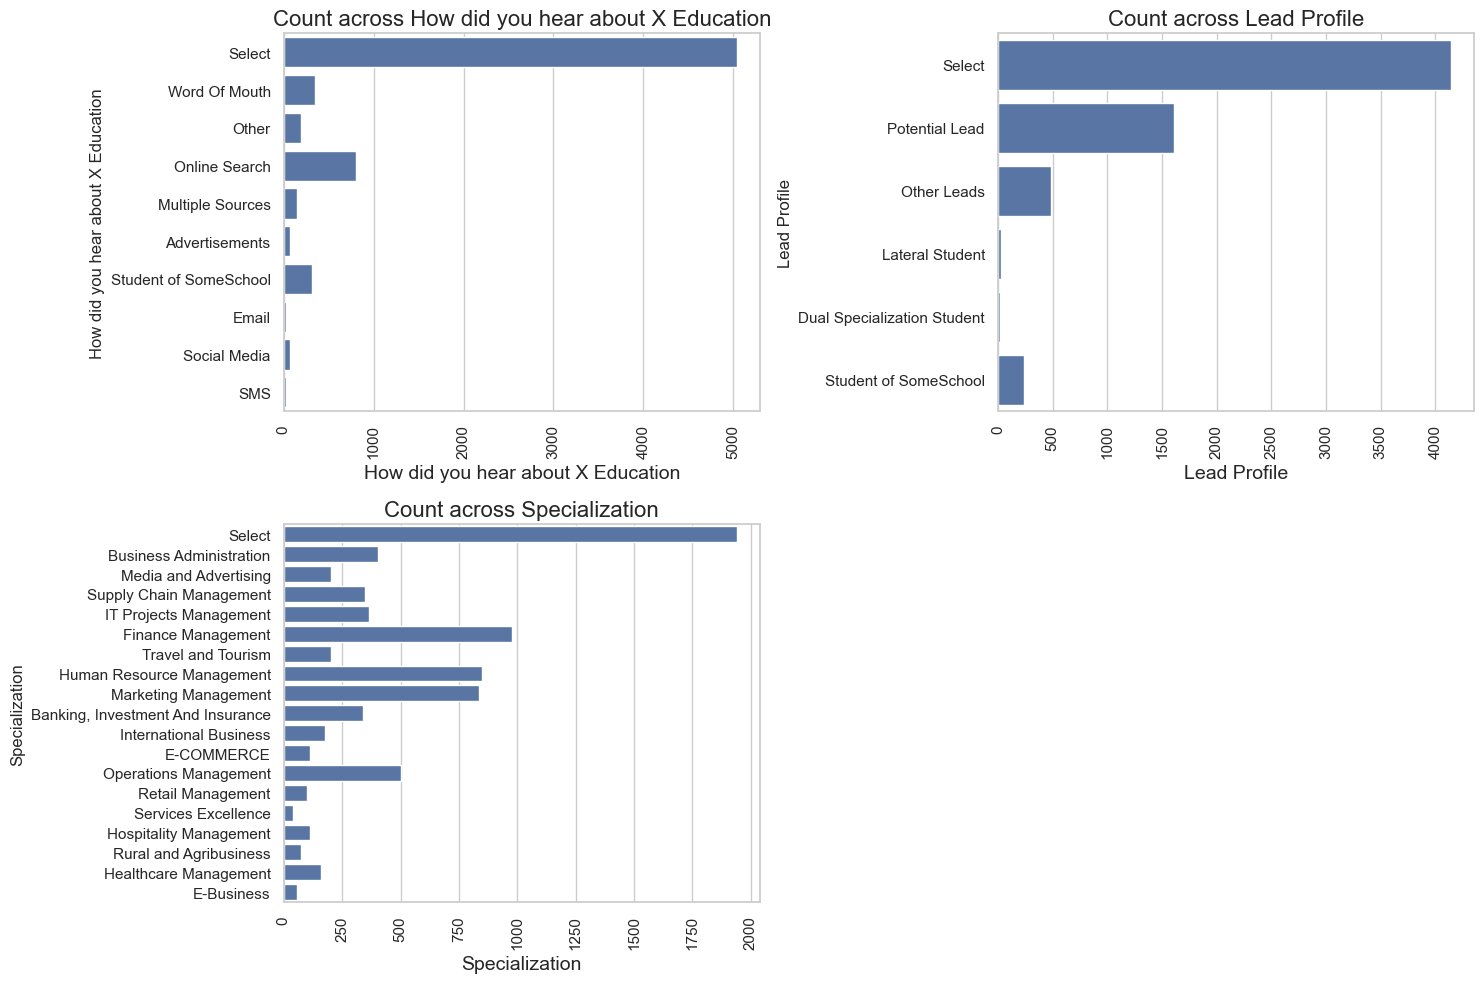

In [138]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()


There are several columns in the dataset where a level called 'Select' appears. This value indicates that the student did not choose an option for that particular column, making it equivalent to a missing value. Therefore, to properly handle these cases, we need to identify the frequency of the 'Select' value across all columns where it appears.

In [139]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


The following three columns now have the level 'Select'. Let's check them once again.

In [140]:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [141]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [142]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

### Visualizing the features

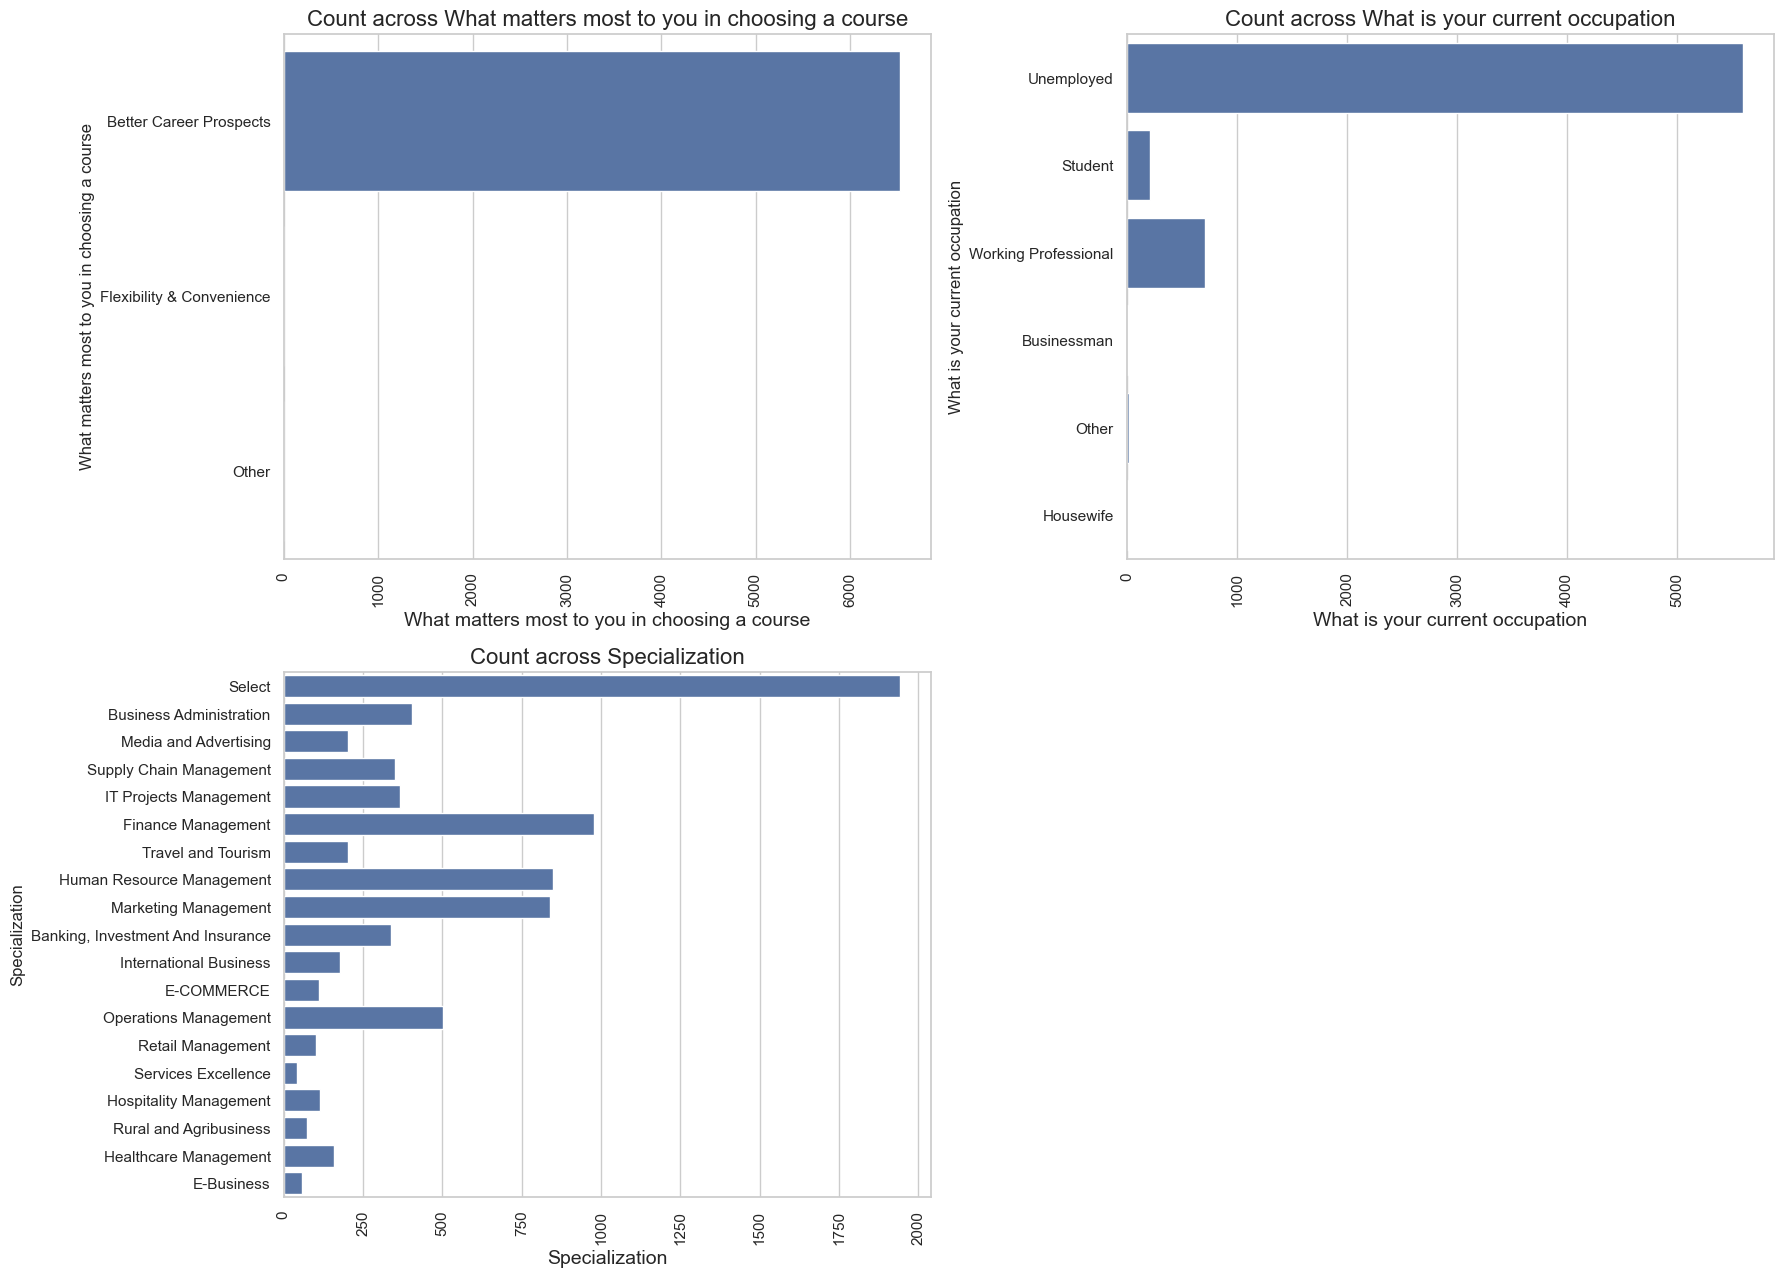

In [143]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()

As observed, the columns "Lead Profile" and "How did you hear about X Education" contain a large number of rows with the value 'Select', which holds no meaningful information for our analysis. Since these values are essentially equivalent to missing data and do not contribute to any useful insights, it is best to drop these columns from the dataset.

In [144]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Additionally, when analyzing the value counts across all columns, we observed that certain columns predominantly contain a single value for nearly all data points. These columns include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get Updates on DM Content, and I Agree to Pay the Amount Through Cheque. Since the majority of the values in these columns are 'No', they do not provide meaningful variation or useful insights for our analysis. Therefore, it is best to drop these columns to improve the efficiency and relevance of our dataset.

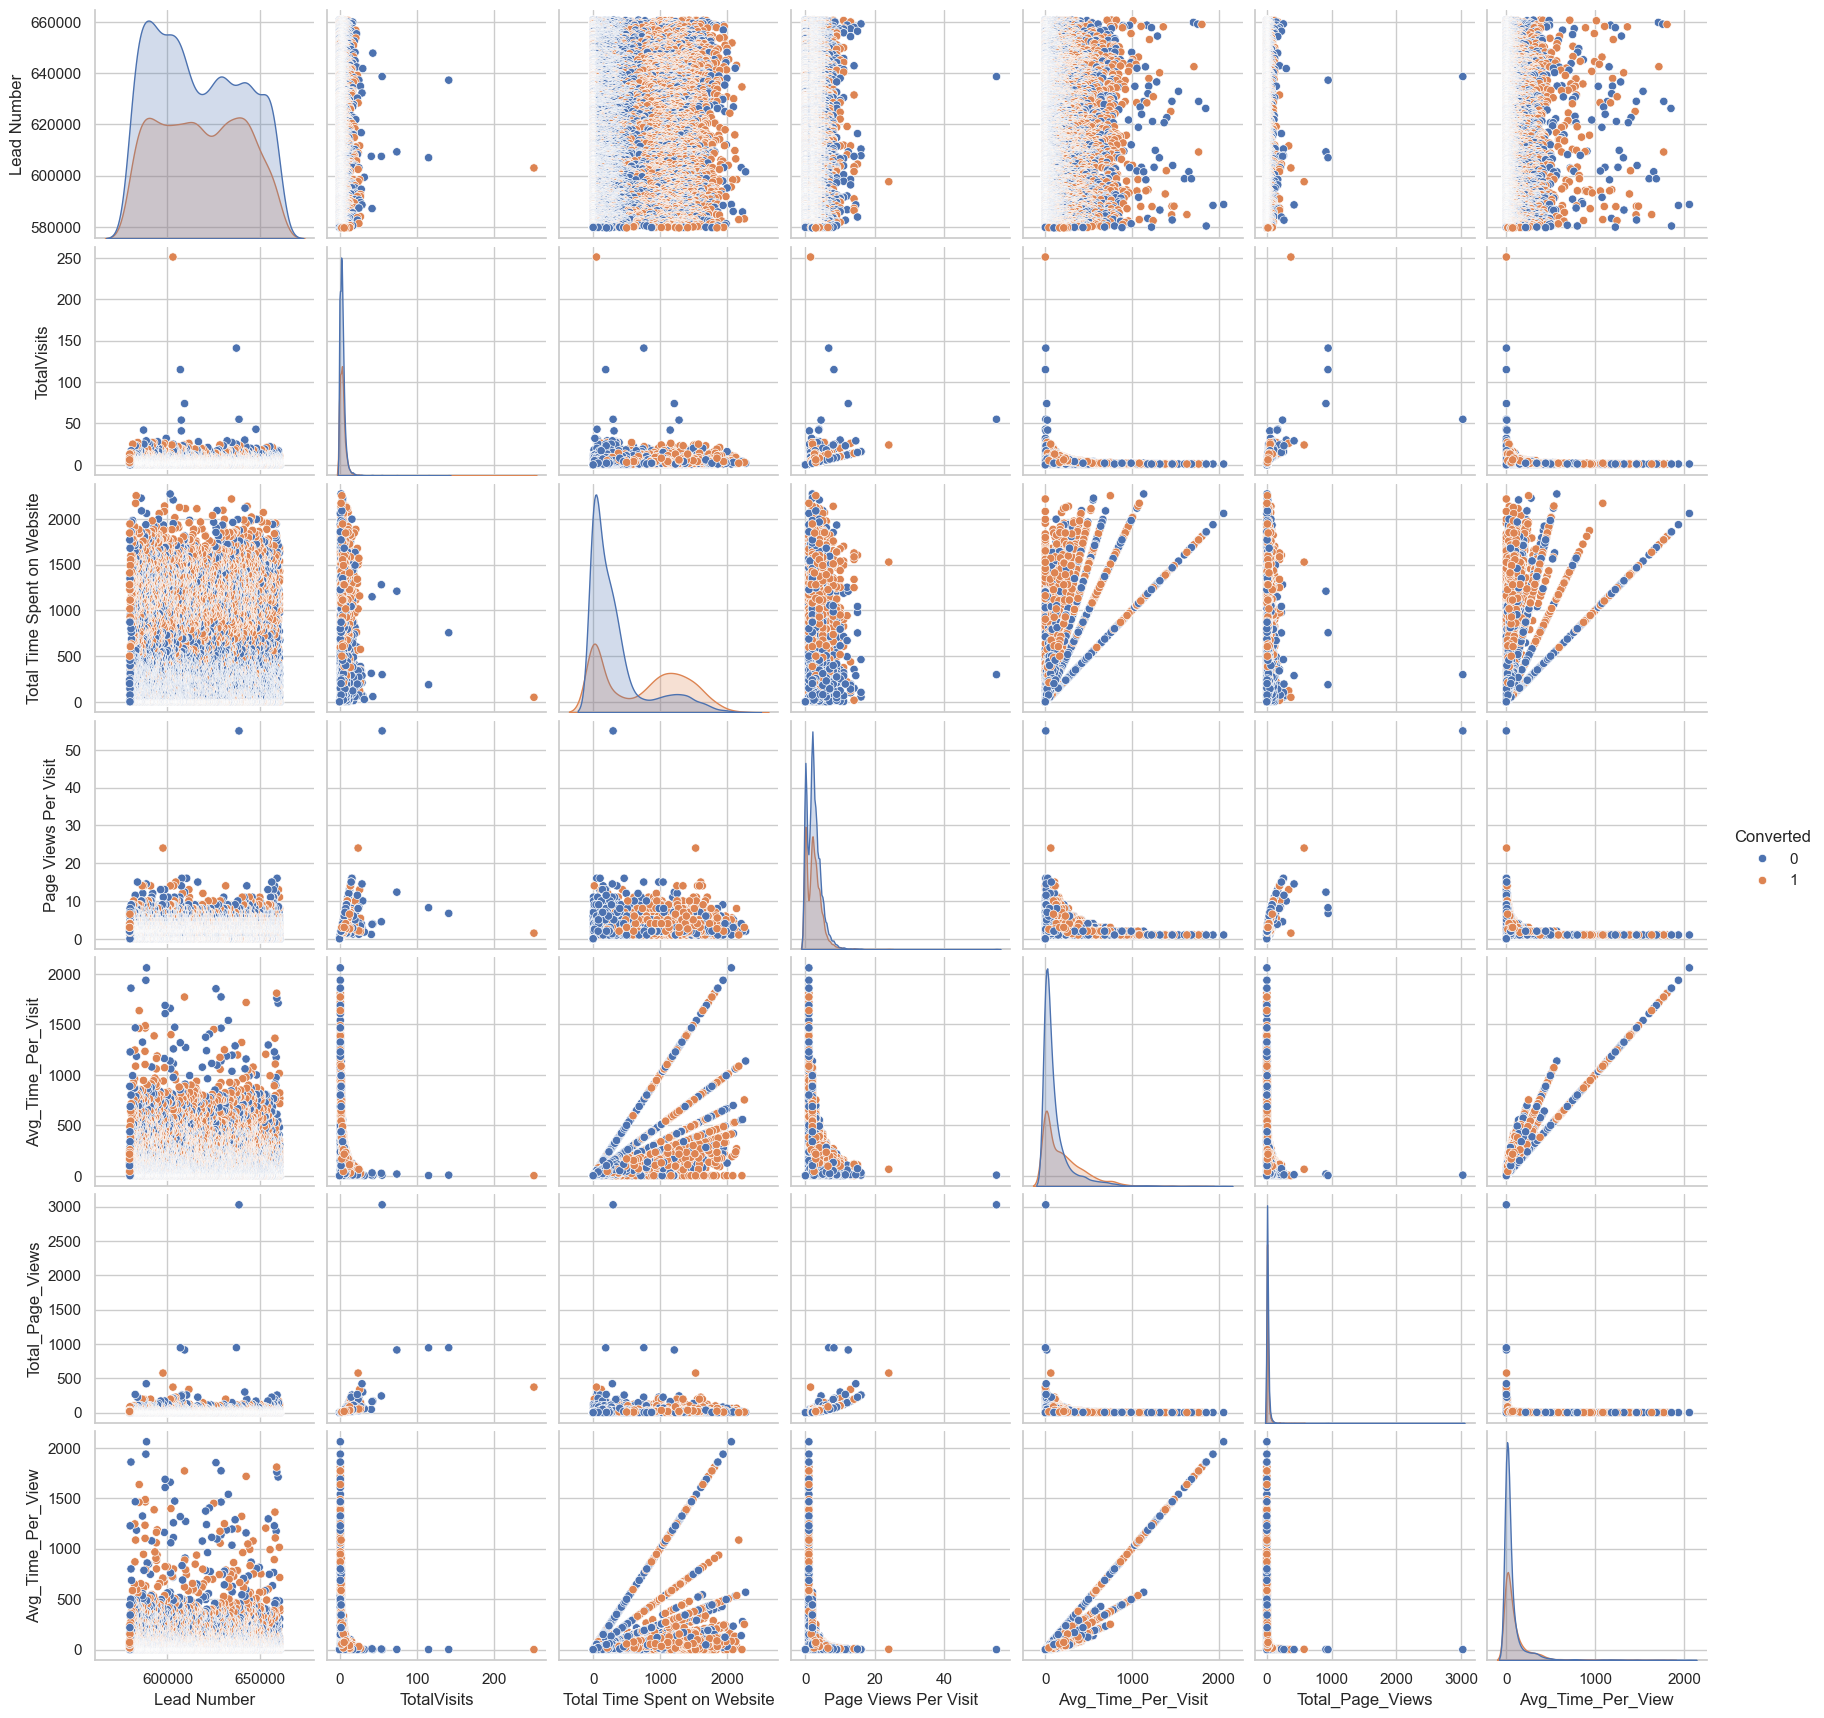

In [145]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

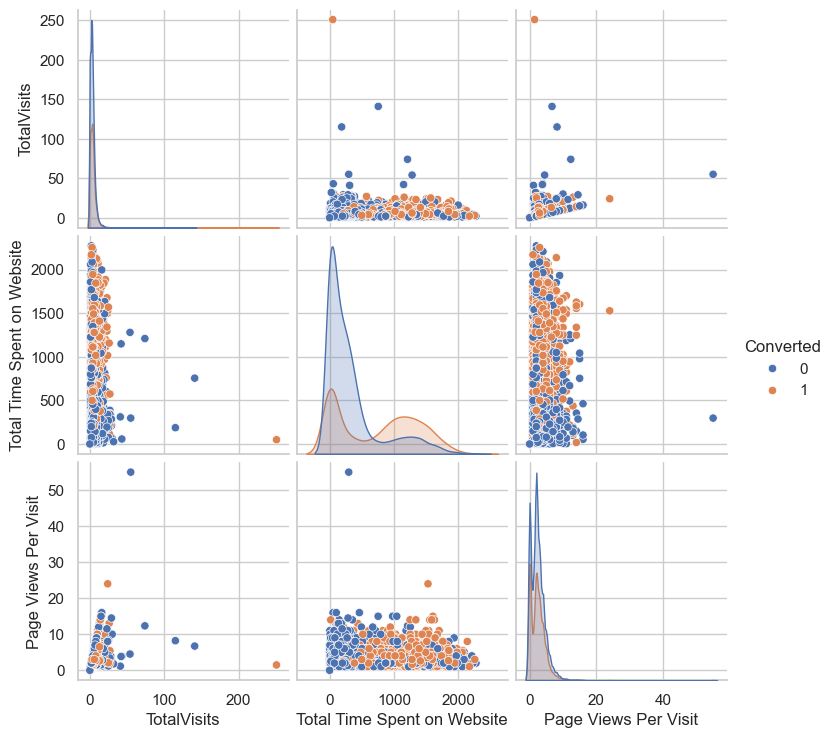

In [146]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [147]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


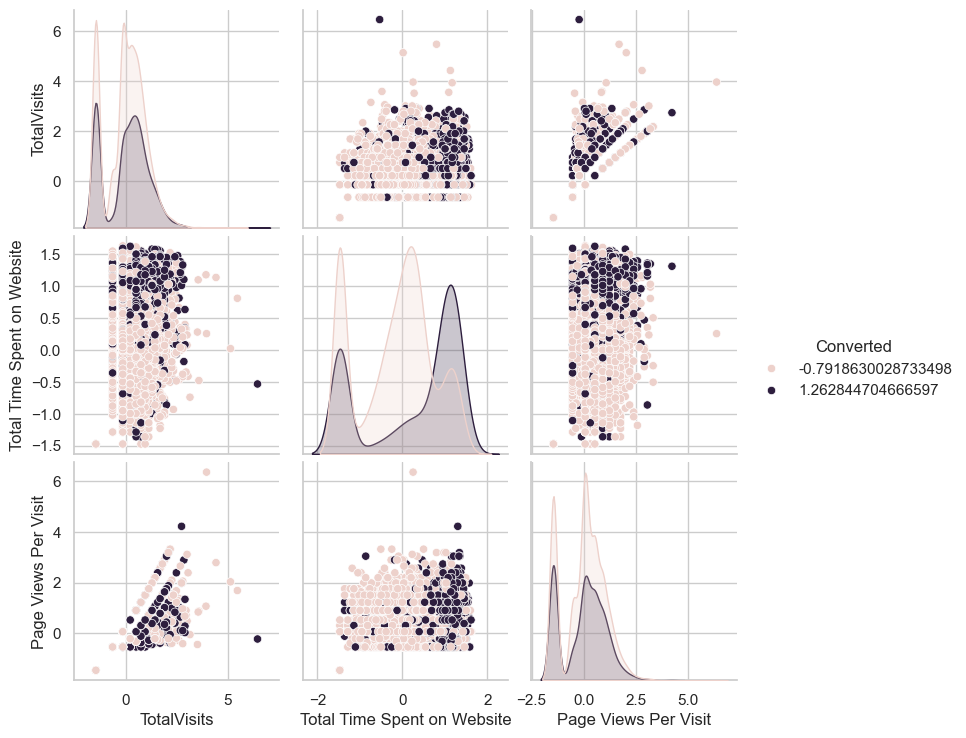

In [148]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [149]:
# Dropping the above columns

In [150]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [151]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

The variable `What matters most to you in choosing a course` has the `level Better Career Prospects` 6528 times while the other two levels appear once twice and once respectively. 

So we should dropping this column as well.

In [152]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [153]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
Page Views Per Visit                       137
Total_Page_Views                           137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Avg_Time_Per_Visit                           0
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Prospect ID                                  0
Lead Number                                  0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Avg_Time_Per_View                            0
dtype: int64

The column What is Your Current Occupation contains a significant number of null values. While one option would be to remove entire rows containing null values, we have already dropped several feature variables, and this column might still hold valuable insights for our analysis. Therefore, instead of discarding the entire dataset rows, we will selectively drop only the rows where What is Your Current Occupation is null, ensuring that we retain as much relevant data as possible.

In [154]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

1. Strongest Correlations
TotalVisits & Page Views Per Visit (0.49):

This is a moderate positive correlation, suggesting that leads who visit more often tend to view more pages per visit.
Possible interpretation: Highly interested leads explore more content on the website.
Converted & Total Time Spent on Website (0.32):

Leads who spend more time on the website are more likely to convert.
Potential action: Improve website engagement by providing useful content and interactive elements to increase time spent.
Total Time Spent on Website & Page Views Per Visit (0.31):

More time spent on the website correlates with higher page views per visit.
This suggests that users who are actively engaging with content are browsing multiple pages.
2. Weak/Negligible Correlations
Lead Number & Other Features (close to 0):

Lead Number does not contribute meaningfully to any insights and can likely be ignored in analysis.
Converted & Page Views Per Visit (-0.066):

Slight negative correlation, meaning that the number of pages viewed per visit doesn’t strongly influence conversion.
Potential interpretation: High browsing doesn’t necessarily mean high conversion. Users may be exploring but not making decisions.
3. Business Implications
The strongest predictor of conversion appears to be Total Time Spent on Website. Consider strategies to keep leads engaged longer.
TotalVisits & Page Views Per Visit correlation (0.49) suggests that retargeting frequent visitors might be an effective strategy.
If the goal is to improve conversion rates, focus on optimizing the website to increase engagement time rather than simply increasing page views.

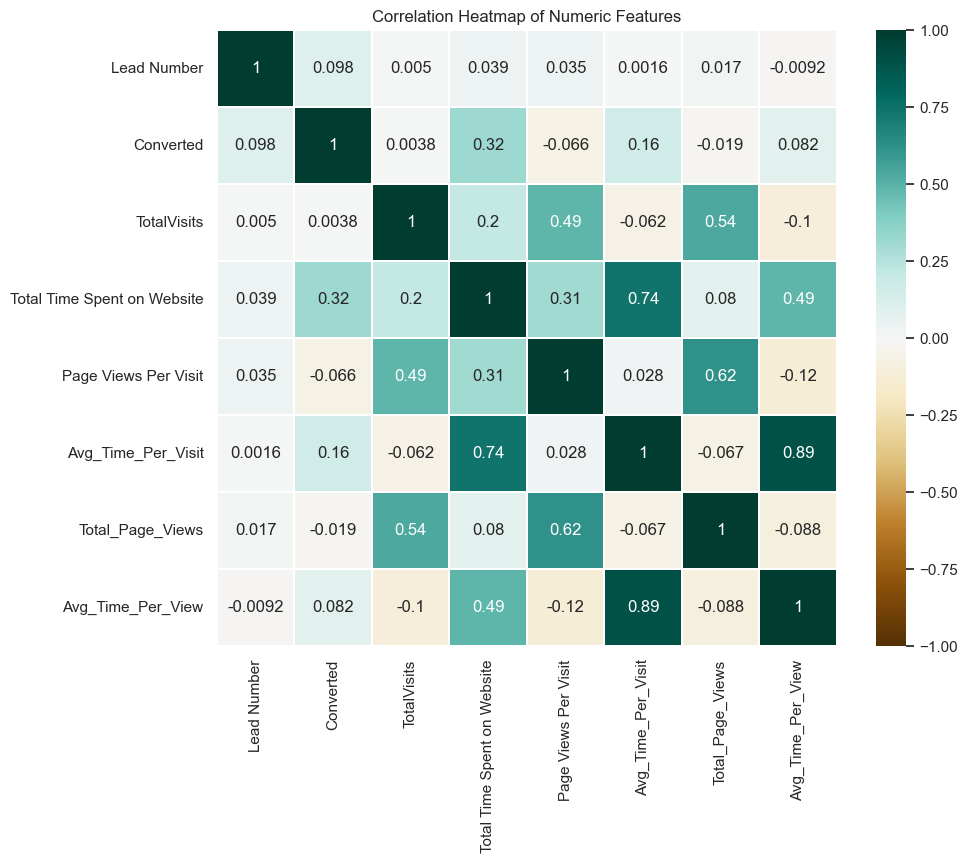

In [155]:
# Select only numeric columns
numeric_df = leads.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="BrBG", robust=True, linewidth=0.1, vmin=-1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Analysing Categorical features

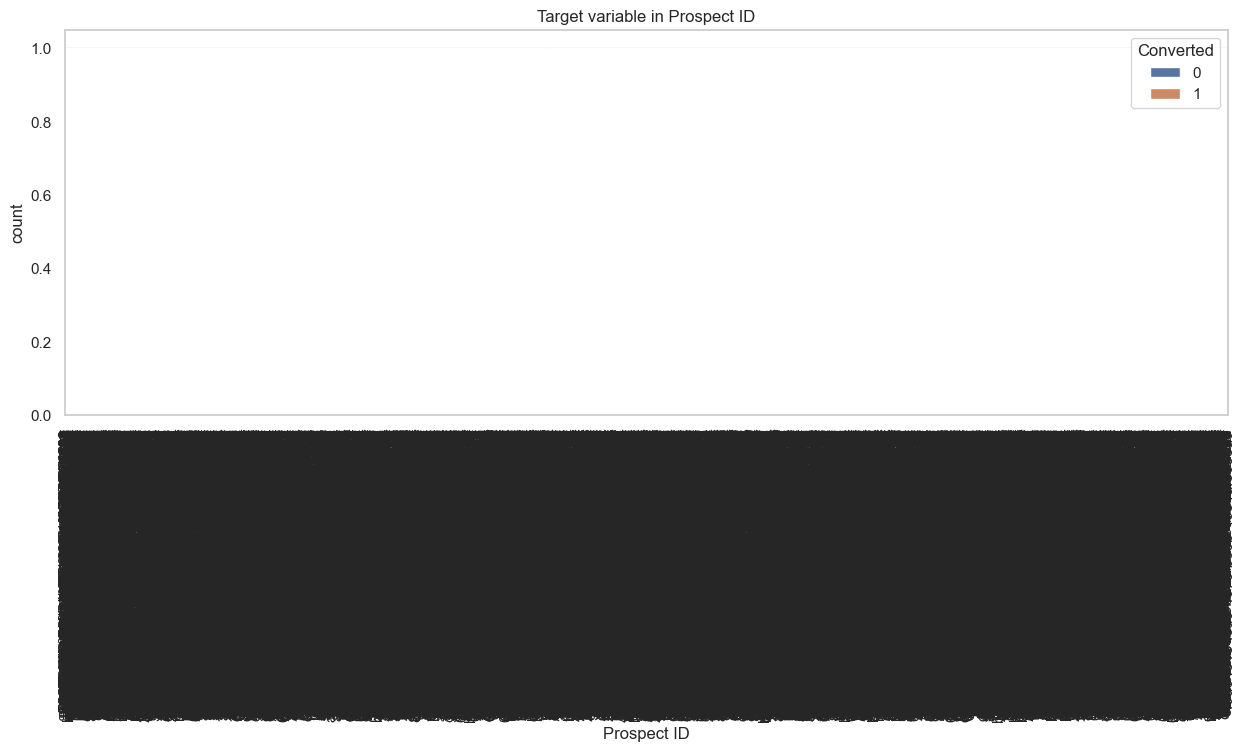

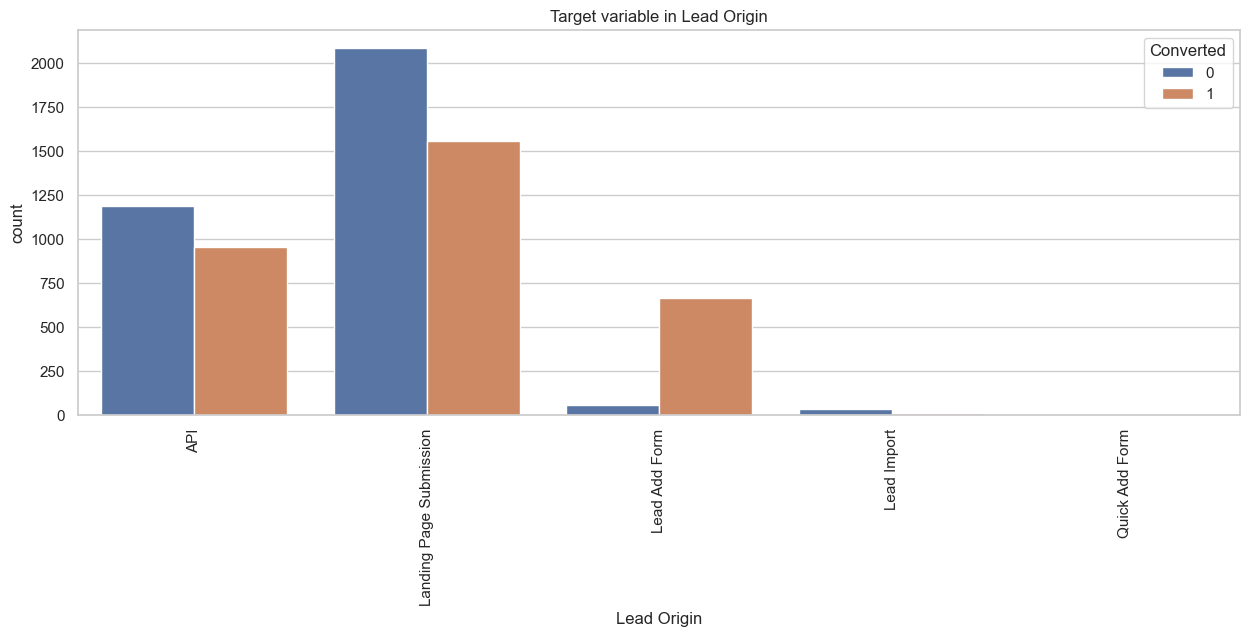

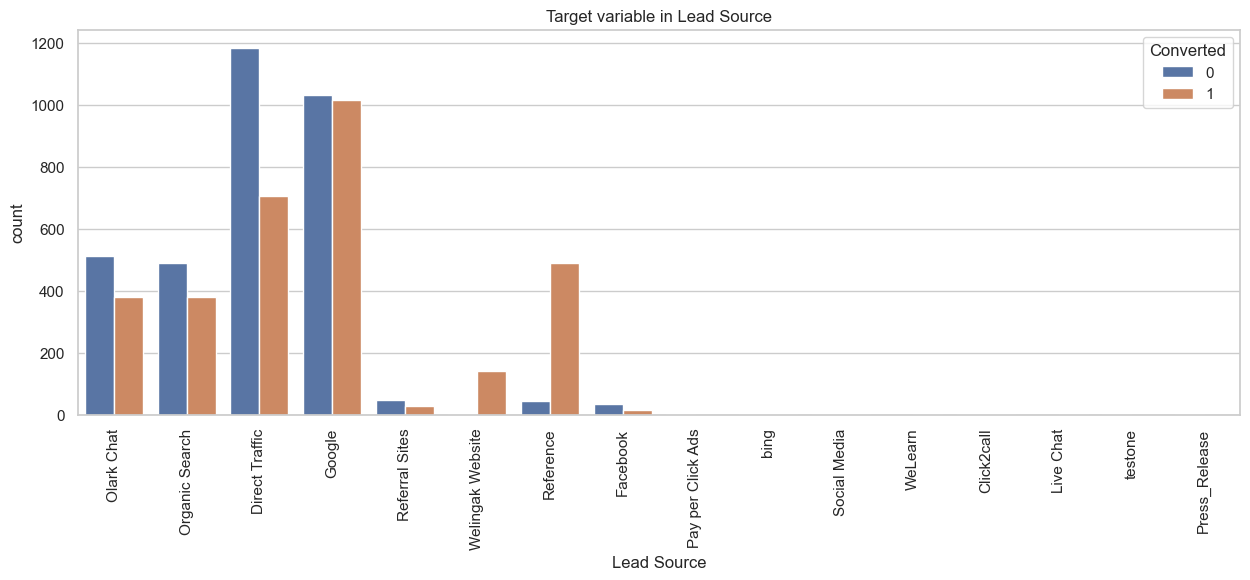

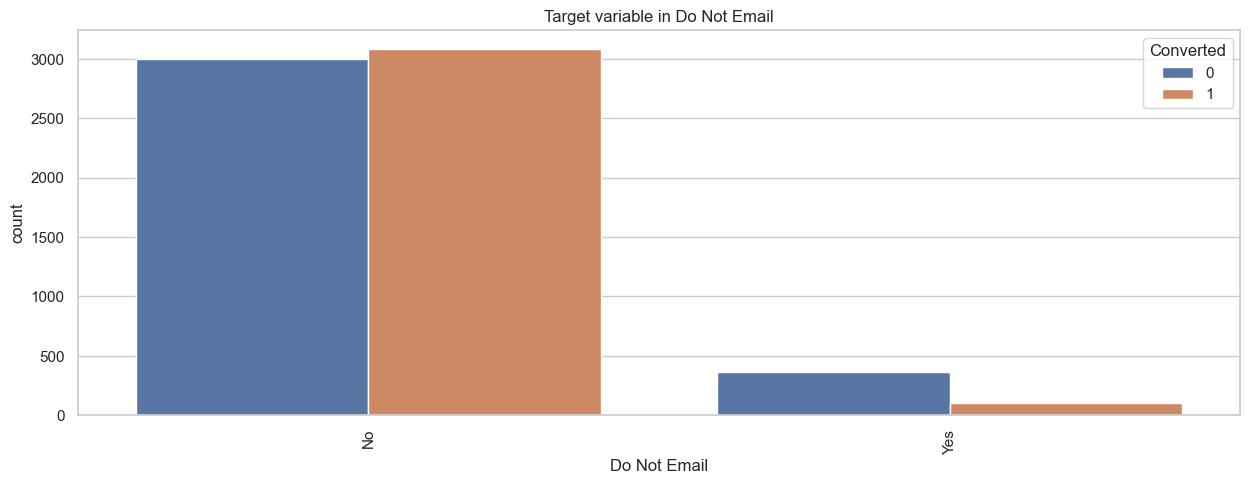

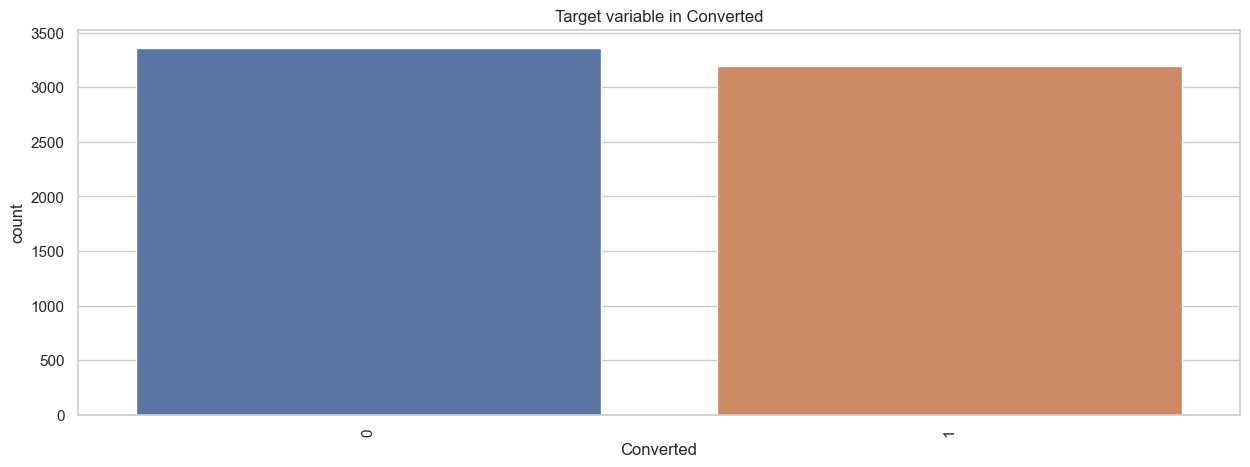

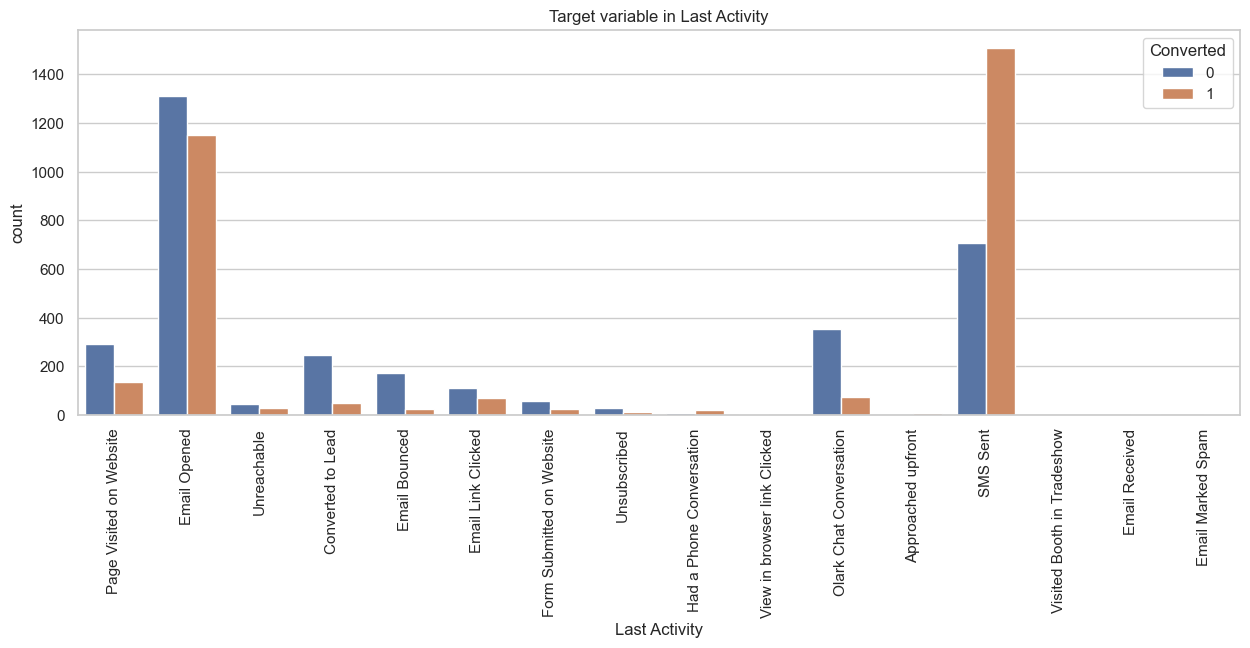

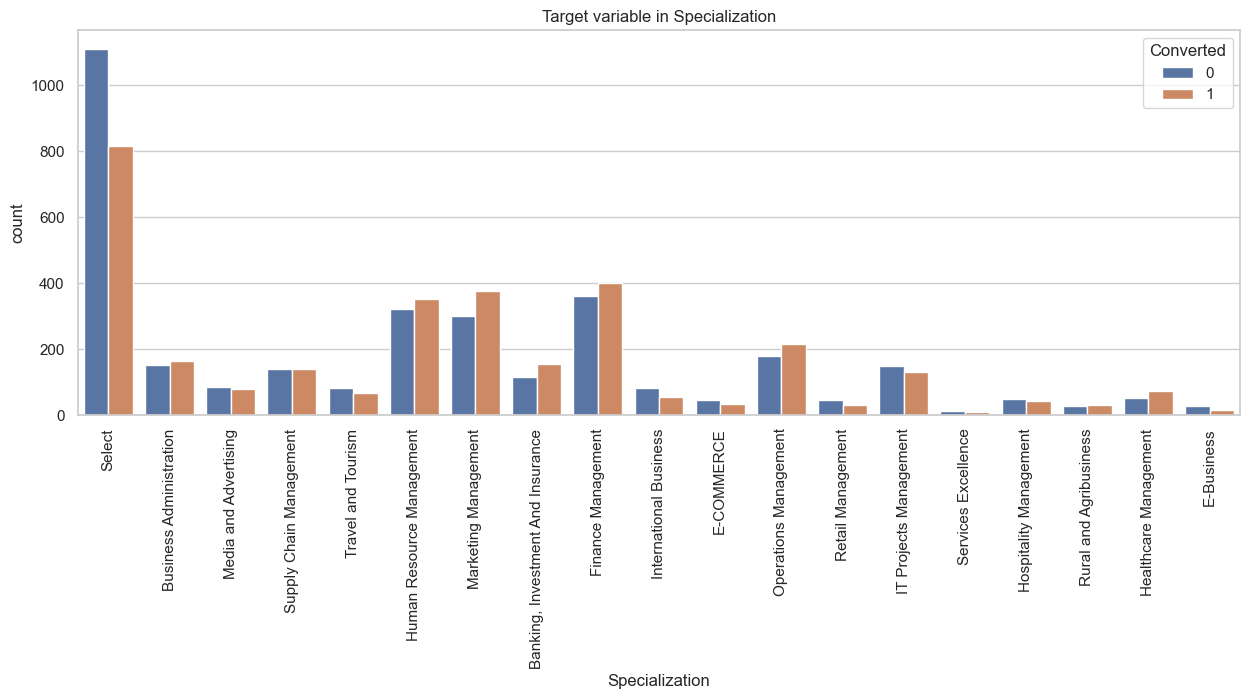

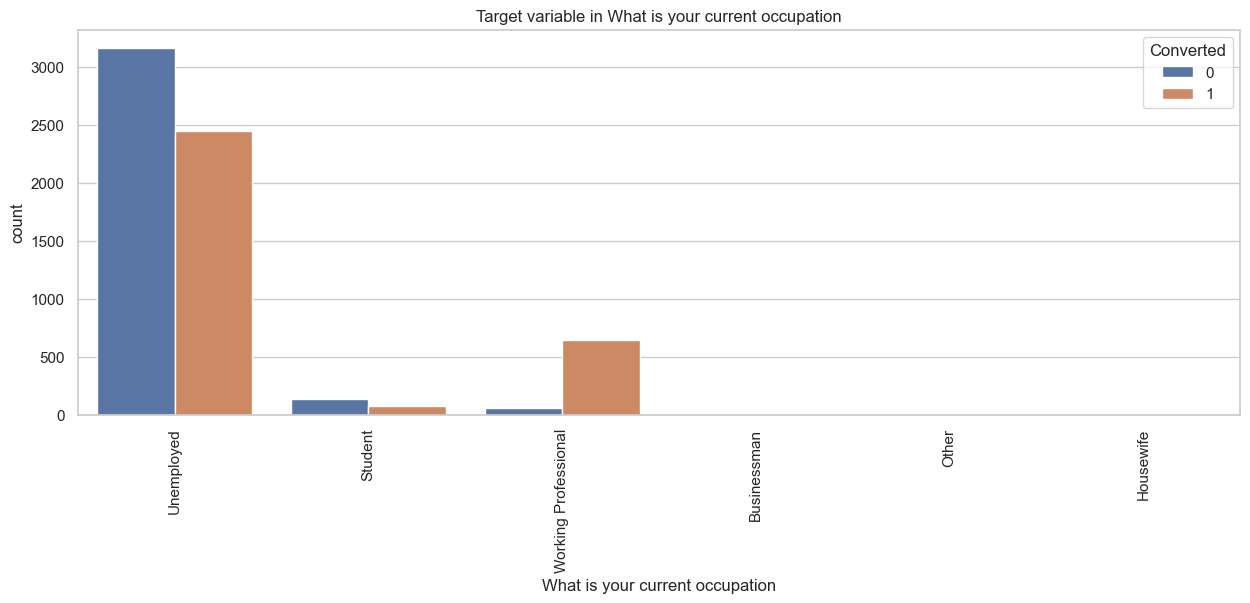

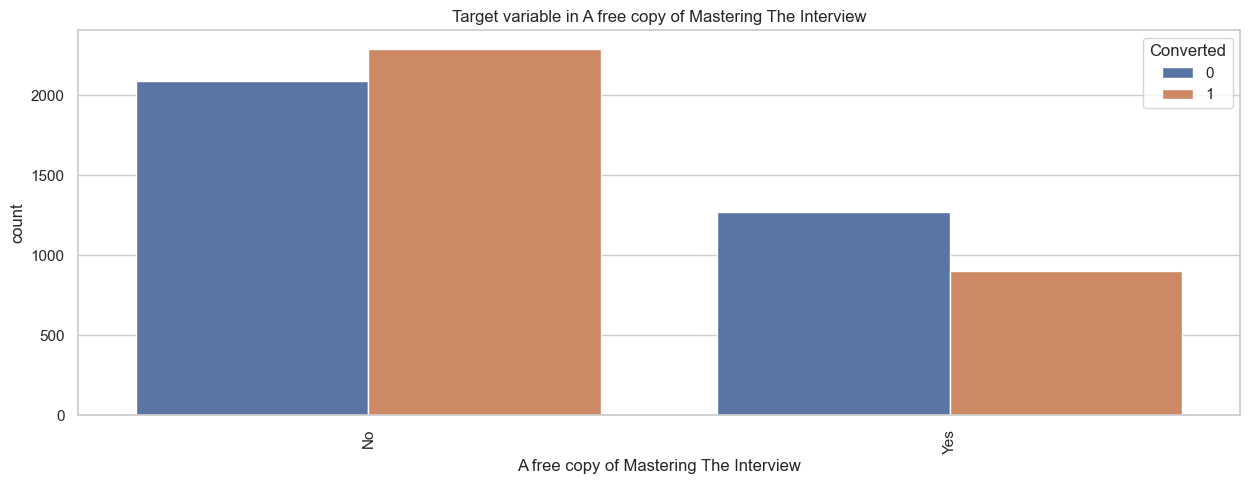

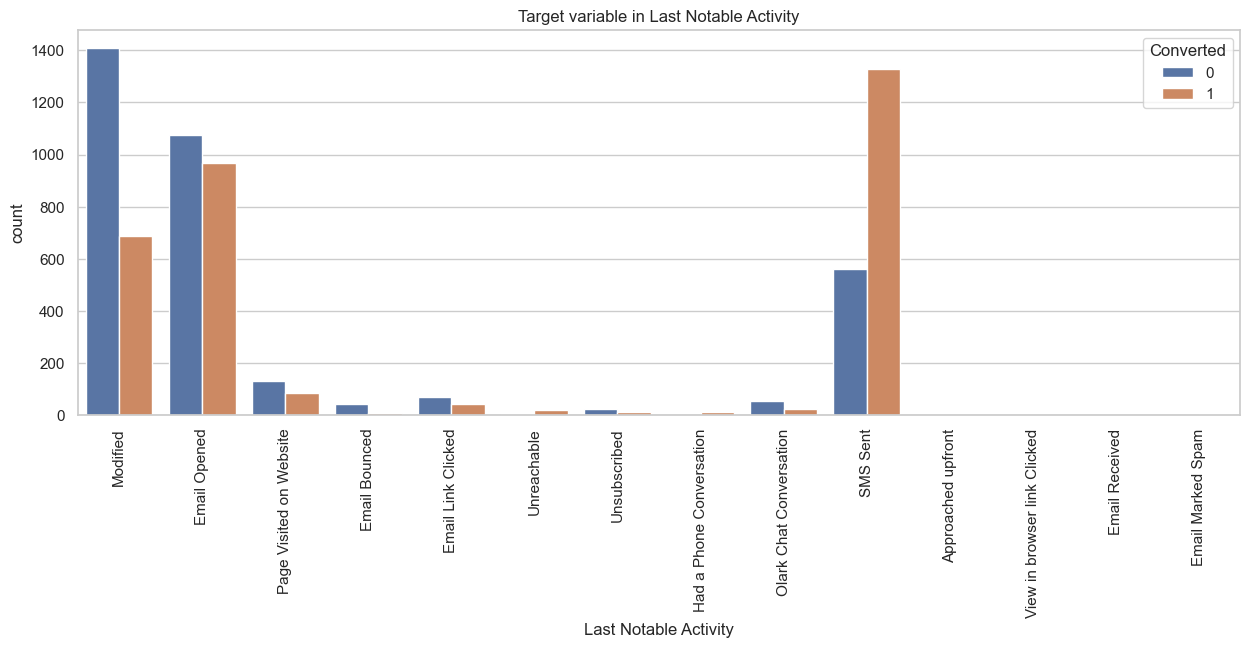

In [156]:
# Convert 'Converted' column to categorical
leads["Converted"] = leads["Converted"].astype(str)

conv = leads.select_dtypes(include="object").columns
for i in conv:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=leads[i], hue=leads["Converted"])  # Ensure 'x=' is explicitly mentioned
    plt.xticks(rotation=90)
    plt.title(f'Target variable in {i}')
    plt.xlabel(i)
    plt.show()

In [157]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                      130
Total_Page_Views                          130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Avg_Time_Per_Visit                          0
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Prospect ID                                 0
Lead Number                                 0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
Avg_Time_Per_View                           0
dtype: int64

At this stage, the number of null values remaining in the dataset is relatively small. Therefore, instead of applying complex imputation techniques, we can simply remove the rows containing these null values to ensure a cleaner and more complete dataset for our analysis.

In [158]:
# Dropping the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [159]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Last Activity                              0
Total_Page_Views                           0
Avg_Time_Per_Visit                         0
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Page Views Per Visit                       0
Lead Number                                0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Origin                                0
Avg_Time_Per_View                          0
dtype: int64

In [160]:
# Dropping the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [161]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Last Activity                              0
Total_Page_Views                           0
Avg_Time_Per_Visit                         0
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Page Views Per Visit                       0
Lead Number                                0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Source                                0
Lead Origin                                0
Avg_Time_Per_View                          0
dtype: int64

In [162]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [163]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Last Activity                             0
Total_Page_Views                          0
Avg_Time_Per_Visit                        0
Last Notable Activity                     0
A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Page Views Per Visit                      0
Lead Number                               0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Avg_Time_Per_View                         0
dtype: int64

At this point, all null values have been removed from the dataset. Now, let's calculate the percentage of rows that we have retained after the data-cleaning process to assess the overall data retention rate.

In [164]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [165]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0.0,0.0,0.00
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,134.8,12.5,53.92
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,766.0,4.0,383.00
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,305.0,1.0,305.00
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,714.0,2.0,714.00


It is evident that the variables Prospect ID and Lead Number serve as unique identifiers and do not contribute any meaningful insights to our analysis. Since they do not provide useful information for modeling or decision-making, it is best to drop these two variables from the dataset.

In [166]:
# Dropping the "Prospect ID" and "Lead Number" 
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [167]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0.0,0.0,0.00
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,134.8,12.5,53.92
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,766.0,4.0,383.00
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,305.0,1.0,305.00
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,714.0,2.0,714.00


### Dummy variable creation

The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [168]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [169]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [170]:
pd.get_dummies(df).astype(int)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [171]:
pd.get_dummies(df, prefix=['col1']).astype(int)

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [172]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True).astype(int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [173]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization').astype(int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [174]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [175]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,134.8,12.5,53.92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,766.0,4.0,383.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,305.0,1.0,305.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,714.0,2.0,714.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

The next step is to spliting the dataset into training an testing sets.

In [176]:
# Importing the `train_test_split` library

In [177]:
# Put all the feature variables in X

X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,134.8,12.5,53.92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,766.0,4.0,383.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,305.0,1.0,305.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,714.0,2.0,714.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: object

In [179]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [180]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 77)
y_train Size (4461,)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [181]:
# Importing the 'MinMax scaler' Library

In [182]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['Avg_Time_Per_Visit', 'Avg_Time_Per_View', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['Avg_Time_Per_Visit', 'Avg_Time_Per_View', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Avg_Time_Per_Visit,Total_Page_Views,Avg_Time_Per_View,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,0.029489,2.0,0.008135,8.0,0.004068,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,4.0,0.082306,4.0,0.022705,16.0,0.005676,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,6.0,0.034331,6.0,0.006314,36.0,0.001052,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

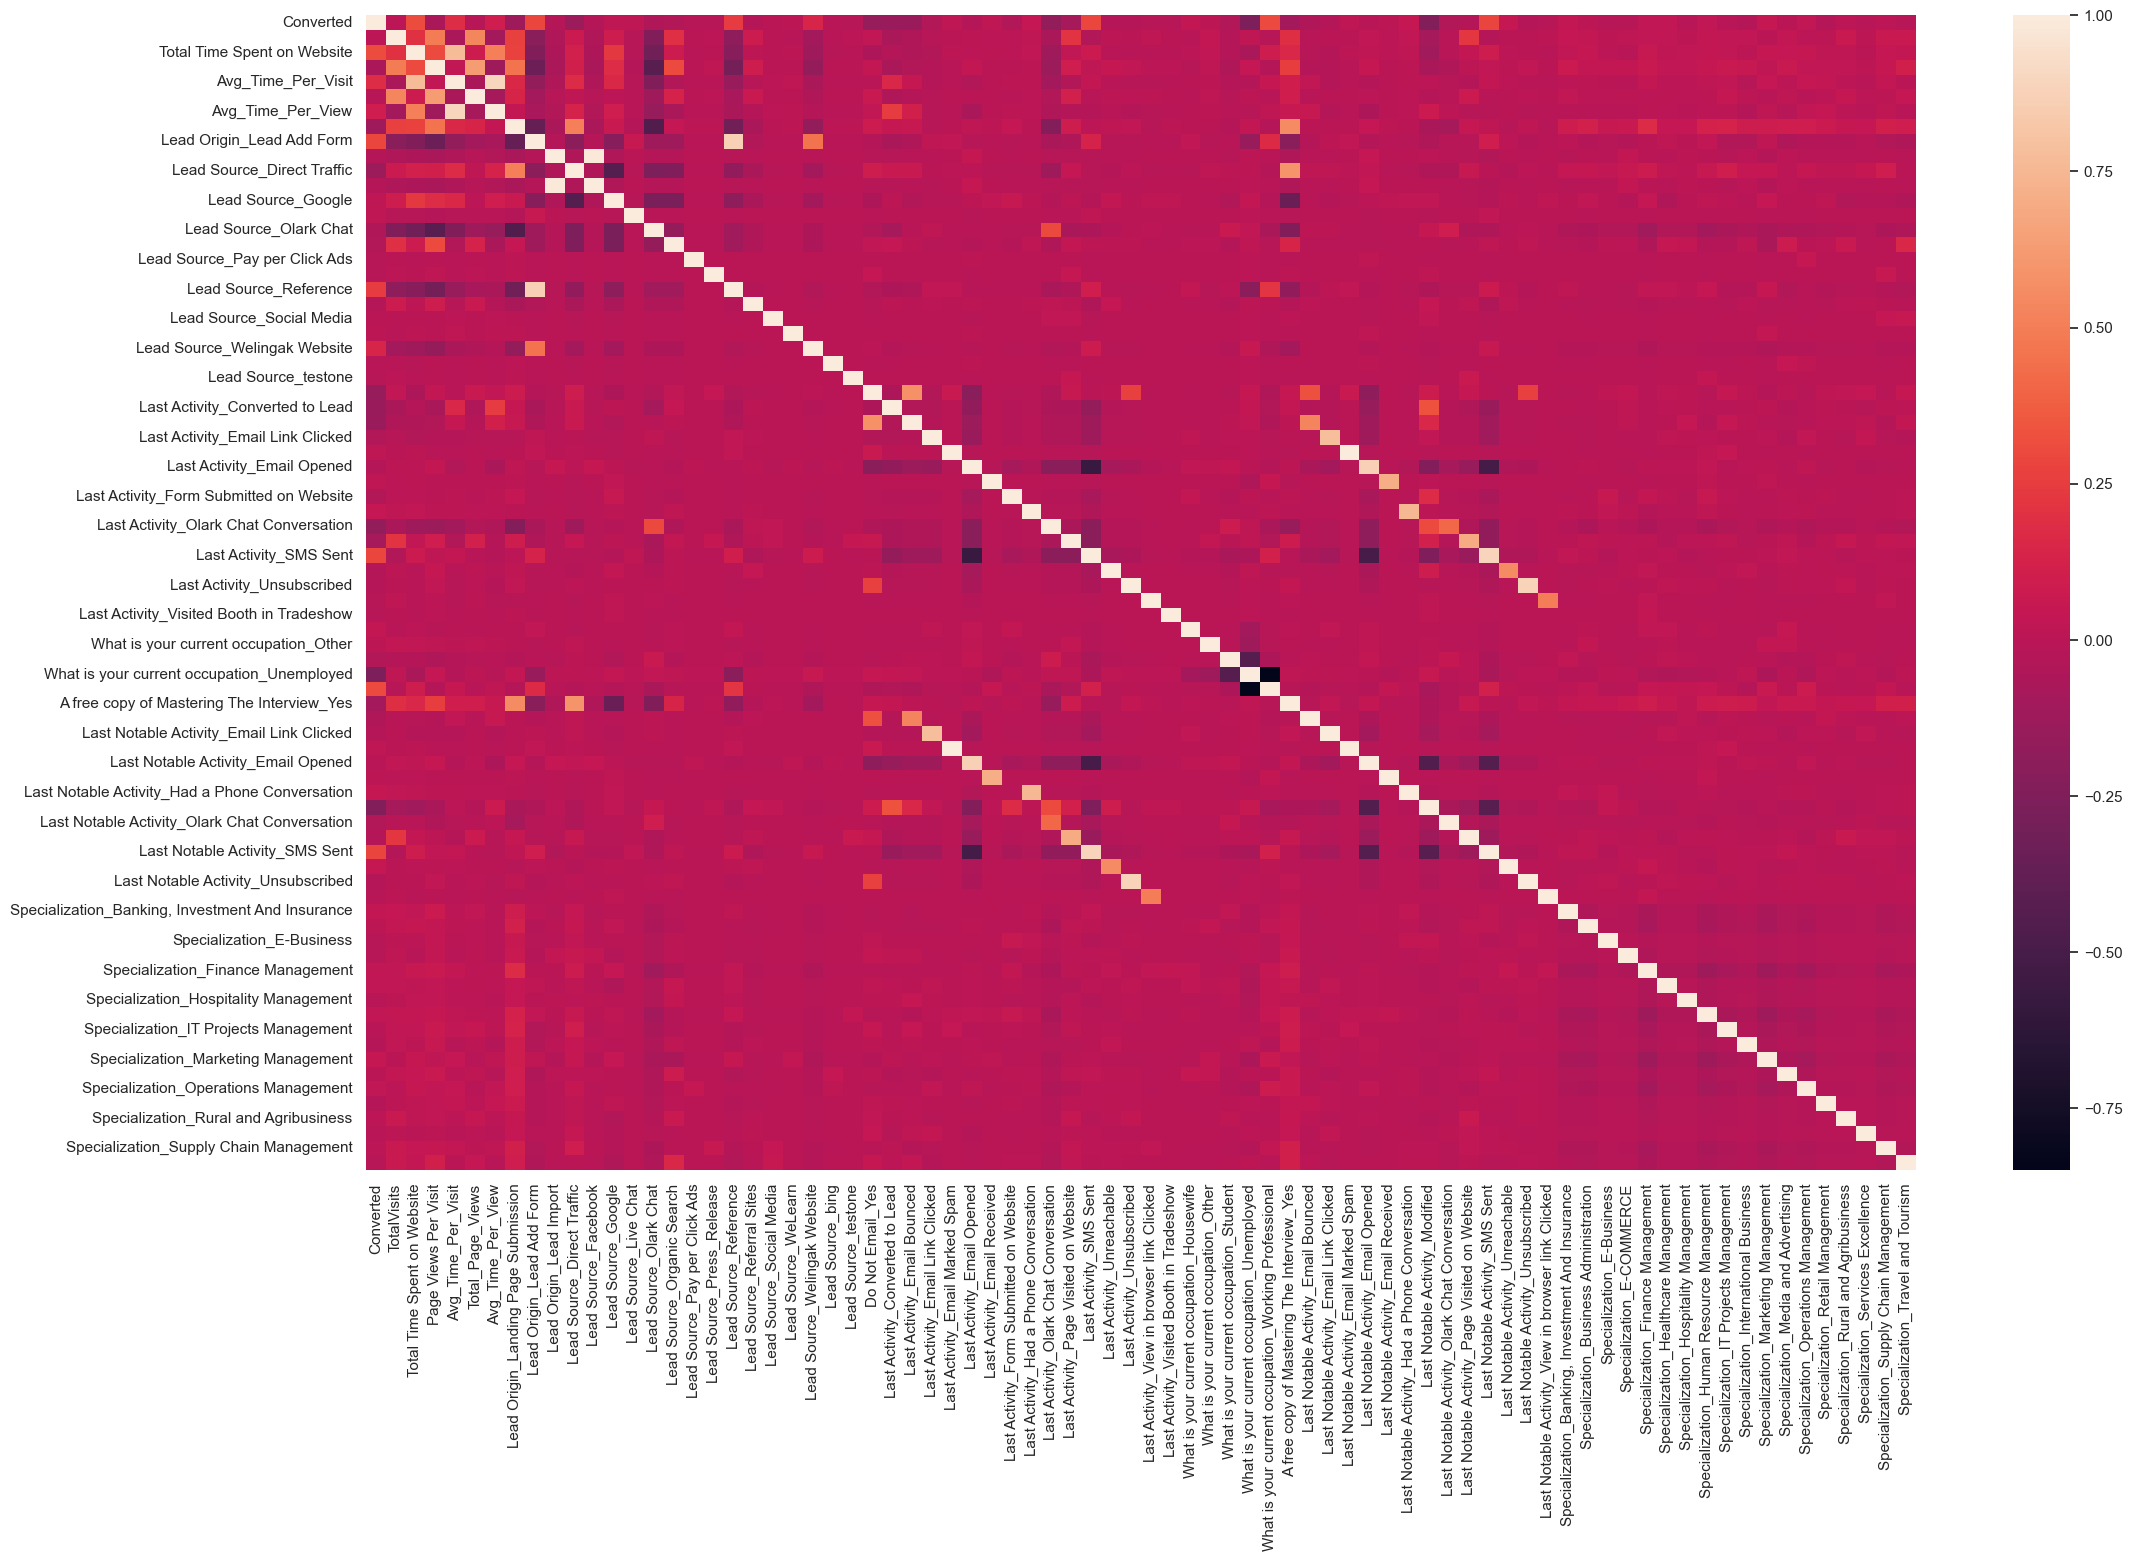

In [183]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [184]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [185]:
# Running RFE with 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [186]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 55),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 52),
 ('Avg_Time_Per_Visit', True, 1),
 ('Total_Page_Views', False, 59),
 ('Avg_Time_Per_View', False, 49),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_testone', False, 39),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_

In [187]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [188]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [189]:
# Importing 'statsmodels'

### Model 1

In [190]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert to numbers
X_train = X_train.fillna(0)  # Handle NaNs


In [191]:
import numpy as np
y_train = y_train.astype(np.float64)  # Convert to float


In [192]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)  # Add intercept
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())  # Fit model
res = logm2.fit()

print(res.summary())  # Display model summary


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.3
Date:                Mon, 17 Mar 2025   Deviance:                       4122.5
Time:                        21:25:56   Pearson chi2:                 4.89e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3692
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

### Checking `VIF`

In [193]:
# Importing the 'variance_inflation_factor' library

In [194]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.17
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
0,Total Time Spent on Website,5.15
1,Avg_Time_Per_Visit,3.75
11,What is your current occupation_Unemployed,3.05
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Professional,1.49


VIFs seem to be in a decent range except for three variables.

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [195]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

### Model 2

In [196]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.7
Date:                Mon, 17 Mar 2025   Deviance:                       4123.5
Time:                        21:25:57   Pearson chi2:                 4.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3691
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7652      0.606     -1.263      0.207      -1.953       0.423
Total Time Spent on Website                              5.7802      0.281     20.552      0.000       5.229       6.331
Avg_Time_Per_Visit                                      -3.8126      0.578     -6.599      0.000      -4.945      -2.680
Lead Origin_Lead Add Form                                4.0249      0.253     15.912      0.000       3.529       4.521
Lead Source_Olark Chat                                   1.2821      0.112     11.415      0.000       1.062       1.502
Lead Source_Welingak Website                             2.1485      1.036      2.073      0.038       0.117       4.180
Do Not Email_Yes                                        -1.4201      0.195     -7.289      0.000      -1.802      -1.038
Last Activity_Had a Phone Conversation                   1.0214      0.986      1.036      0.300      -0.911       2.953
Last Activity_SMS Sent                                   1.1569      0.082     14.041      0.000       0.995       1.318
What is your current occupation_Housewife               22.5469   2.42e+04      0.001      0.999   -4.74e+04    4.75e+04
What is your current occupation_Student                 -1.2192      0.641     -1.902      0.057      -2.476       0.037
What is your current occupation_Unemployed              -1.3722      0.606     -2.266      0.023      -2.559      -0.185
What is your current occupation_Working Professional     1.2213      0.634      1.927      0.054      -0.021       2.463
Last Notable Activity_Had a Phone Conversation          23.3108   2.04e+04      0.001      0.999      -4e+04       4e+04
Last Notable Activity_Unreachable                        2.7424      0.808      3.394      0.001       1.158       4.326
========================================================================================================================
"""

#### Checking VIF

In [197]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,5.15
1,Avg_Time_Per_Visit,3.75
10,What is your current occupation_Unemployed,3.05
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
2,Lead Origin_Lead Add Form,1.66
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Professional,1.48
3,Lead Source_Olark Chat,1.37
4,Lead Source_Welingak Website,1.33


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [198]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 3

In [199]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.8
Date:                Mon, 17 Mar 2025   Deviance:                       4129.6
Time:                        21:25:57   Pearson chi2:                 4.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3682
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7629      0.606     -1.259      0.208      -1.950       0.424
Total Time Spent on Website                              5.7716      0.281     20.535      0.000       5.221       6.322
Avg_Time_Per_Visit                                      -3.8103      0.578     -6.598      0.000      -4.942      -2.678
Lead Origin_Lead Add Form                                4.0226      0.253     15.904      0.000       3.527       4.518
Lead Source_Olark Chat                                   1.2799      0.112     11.399      0.000       1.060       1.500
Lead Source_Welingak Website                             2.1484      1.036      2.073      0.038       0.117       4.180
Do Not Email_Yes                                        -1.4198      0.195     -7.290      0.000      -1.802      -1.038
Last Activity_Had a Phone Conversation                   2.8389      0.804      3.532      0.000       1.264       4.414
Last Activity_SMS Sent                                   1.1566      0.082     14.043      0.000       0.995       1.318
What is your current occupation_Housewife               21.5461   1.47e+04      0.001      0.999   -2.88e+04    2.88e+04
What is your current occupation_Student                 -1.2190      0.641     -1.902      0.057      -2.475       0.037
What is your current occupation_Unemployed              -1.3719      0.605     -2.266      0.023      -2.558      -0.185
What is your current occupation_Working Professional     1.2191      0.634      1.924      0.054      -0.023       2.461
Last Notable Activity_Unreachable                        2.7411      0.808      3.392      0.001       1.157       4.325
========================================================================================================================
"""

Dropping the `What is your current occupation_Housewife` as having high P value

In [200]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 4

In [201]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.9
Date:                Mon, 17 Mar 2025   Deviance:                       4133.9
Time:                        21:25:57   Pearson chi2:                 4.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2213      0.556     -0.398      0.691      -1.311       0.868
Total Time Spent on Website                              5.7639      0.281     20.519      0.000       5.213       6.314
Avg_Time_Per_Visit                                      -3.7940      0.577     -6.573      0.000      -4.925      -2.663
Lead Origin_Lead Add Form                                4.0234      0.253     15.911      0.000       3.528       4.519
Lead Source_Olark Chat                                   1.2782      0.112     11.383      0.000       1.058       1.498
Lead Source_Welingak Website                             2.1469      1.036      2.072      0.038       0.116       4.178
Do Not Email_Yes                                        -1.4223      0.195     -7.295      0.000      -1.804      -1.040
Last Activity_Had a Phone Conversation                   2.8384      0.804      3.532      0.000       1.263       4.414
Last Activity_SMS Sent                                   1.1566      0.082     14.043      0.000       0.995       1.318
What is your current occupation_Student                 -1.7595      0.595     -2.959      0.003      -2.925      -0.594
What is your current occupation_Unemployed              -1.9126      0.556     -3.439      0.001      -3.003      -0.822
What is your current occupation_Working Professional     0.6783      0.587      1.156      0.248      -0.471       1.828
Last Notable Activity_Unreachable                        2.7378      0.809      3.386      0.001       1.153       4.323
========================================================================================================================
"""

Droppint hre  `What is your current occupation_Working Professional` as having high P value

In [202]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 4

In [203]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.5
Date:                Mon, 17 Mar 2025   Deviance:                       4135.1
Time:                        21:25:57   Pearson chi2:                 4.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3675
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.3919      0.189      2.074      0.038       0.021       0.762
Total Time Spent on Website                    5.7624      0.281     20.514      0.000       5.212       6.313
Avg_Time_Per_Visit                            -3.7867      0.577     -6.562      0.000      -4.918      -2.656
Lead Origin_Lead Add Form                      4.0250      0.253     15.918      0.000       3.529       4.521
Lead Source_Olark Chat                         1.2797      0.112     11.399      0.000       1.060       1.500
Lead Source_Welingak Website                   2.1454      1.036      2.070      0.038       0.114       4.177
Do Not Email_Yes                              -1.4198      0.195     -7.286      0.000      -1.802      -1.038
Last Activity_Had a Phone Conversation         2.8412      0.803      3.536      0.000       1.266       4.416
Last Activity_SMS Sent                         1.1599      0.082     14.101      0.000       0.999       1.321
What is your current occupation_Student       -2.3741      0.282     -8.424      0.000      -2.927      -1.822
What is your current occupation_Unemployed    -2.5277      0.186    -13.615      0.000      -2.892      -2.164
Last Notable Activity_Unreachable              2.7387      0.809      3.387      0.001       1.154       4.324
==============================================================================================================
"""

#### Checking final VIF

In [204]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,4.64
1,Avg_Time_Per_Visit,3.75
9,What is your current occupation_Unemployed,2.48
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.44
4,Lead Source_Welingak Website,1.30
3,Lead Source_Olark Chat,1.29
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [205]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.302224
218     0.148371
4171    0.123270
4037    0.298169
3660    0.954745
207     0.204332
2044    0.177127
6411    0.960262
6498    0.074968
2085    0.982615
dtype: float64

In [206]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3022239 , 0.14837097, 0.12327032, 0.29816917, 0.95474459,
       0.20433205, 0.17712703, 0.9602624 , 0.07496765, 0.98261526])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [207]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.302224
1,0.0,0.148371
2,1.0,0.123270
3,1.0,0.298169
4,1.0,0.954745


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [208]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.302224,0
1,0.0,0.148371,0
2,1.0,0.123270,0
3,1.0,0.298169,0
4,1.0,0.954745,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [209]:
# Importing the 'metrics' library from sklearn for evaluation

### Creating the `Confusion matrix`


In [210]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1935  377]
 [ 556 1593]]


In [211]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7908540685944856


In [212]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [213]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7412750116333178

In [214]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8369377162629758

### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [215]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [216]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

In [217]:
# Importing the 'matplotlib'  to plot the ROC curve`

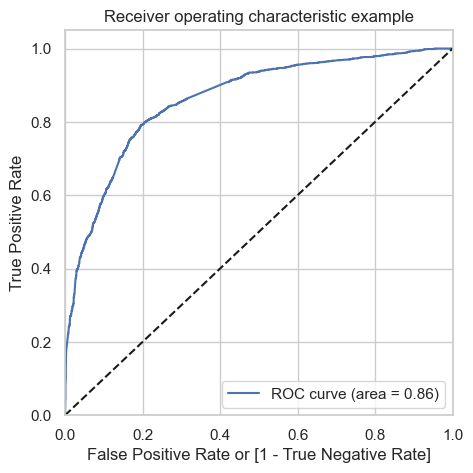

In [218]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [219]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.302224,0,1,1,1,1,0,0,0,0,0,0
1,0.0,0.148371,0,1,1,0,0,0,0,0,0,0,0
2,1.0,0.123270,0,1,1,0,0,0,0,0,0,0,0
3,1.0,0.298169,0,1,1,1,0,0,0,0,0,0,0
4,1.0,0.954745,1,1,1,1,1,1,1,1,1,1,1


In [220]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.518269  0.997208  0.073097
0.2   0.2  0.701412  0.941833  0.477941
0.3   0.3  0.770903  0.864123  0.684256
0.4   0.4  0.795337  0.803630  0.787630
0.5   0.5  0.790854  0.741275  0.836938
0.6   0.6  0.763058  0.631922  0.884948
0.7   0.7  0.740417  0.551885  0.915657
0.8   0.8  0.715086  0.461610  0.950692
0.9   0.9  0.647613  0.288041  0.981834


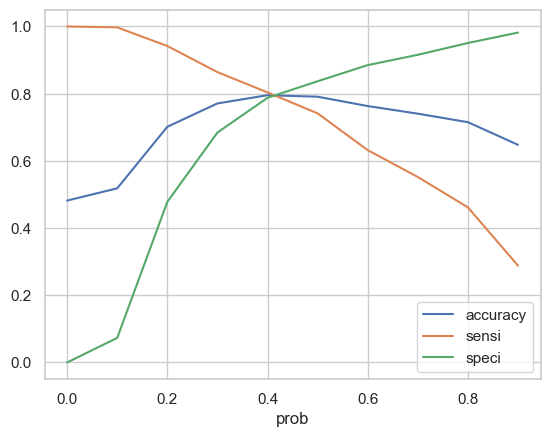

In [221]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around `0.42`, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.302224,0,1,1,1,1,0,0,0,0,0,0,0
1,0.0,0.148371,0,1,1,0,0,0,0,0,0,0,0,0
2,1.0,0.123270,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,0.298169,0,1,1,1,0,0,0,0,0,0,0,0
4,1.0,0.954745,1,1,1,1,1,1,1,1,1,1,1,1


In [223]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7975790181573639

In [224]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1856,  456],
       [ 447, 1702]], dtype=int64)

In [225]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [226]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.7919962773382969

In [227]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.8027681660899654

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set
Let's now make predicitons on the test set

In [228]:
print("Columns in training data:", scaler.feature_names_in_)
print("Columns in X_test:", X_test.columns)


Columns in training data: ['Avg_Time_Per_Visit' 'Avg_Time_Per_View' 'Total Time Spent on Website']
Columns in X_test: Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Avg_Time_Per_Visit', 'Total_Page_Views', 'Avg_Time_Per_View',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
      

In [229]:
columns_to_scale = ['Avg_Time_Per_Visit','Avg_Time_Per_View', 'Total Time Spent on Website']

# Ensure these exact columns exist in X_test before applying transformation
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [230]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Avg_Time_Per_Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.029049,0.004579,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.416813,0.114983,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.378961,0.139388,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.395246,0.054517,0,0,0,0,0,0,1,0,0,1,0,0,0


In [231]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [232]:
# Checking X_test_sm

X_test_sm

,const,Total Time Spent on Website,Avg_Time_Per_Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.029049,0.004579,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.416813,0.114983,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.378961,0.139388,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.395246,0.054517,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.027289,0.010037,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.152289,0.056014,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.702025,0.055332,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.417694,0.153634,0,0,0,0,1,0,1,0,0,1,0,0,0


In [233]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], axis=1, 
                                inplace = True)

In [234]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [235]:
y_test_pred[:10]

4771    0.996230
6122    0.120714
9202    0.729203
6570    0.323062
2668    0.749373
4233    0.804043
3368    0.611650
9091    0.504738
5972    0.296779
3631    0.819903
dtype: float64

In [236]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [237]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996230
6122,0.120714
9202,0.729203
6570,0.323062
2668,0.749373


In [238]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [239]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [240]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [241]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996230
1,0,0.120714
2,0,0.729203
3,1,0.323062
4,1,0.749373


In [242]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [243]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996230
1,0,0.120714
2,0,0.729203
3,1,0.323062
4,1,0.749373


In [244]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [245]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996230,1
1,0,0.120714,0
2,0,0.729203,1
3,1,0.323062,0
4,1,0.749373,1


In [246]:
from sklearn import metrics

# Convert both columns to integer type
y_pred_final['Converted'] = y_pred_final['Converted'].astype(int)
y_pred_final['final_predicted'] = y_pred_final['final_predicted'].astype(int)

# Check accuracy
accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7840


In [247]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[785, 211],
       [202, 714]], dtype=int64)

In [248]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [249]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7794759825327511

In [250]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7881526104417671

### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [251]:
#Looking at the confusion matrix again

In [252]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1935,  377],
       [ 556, 1593]], dtype=int64)

#### Precision = 
         TP / TP + FP

In [253]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8086294416243655

#### Recall = 
          TP / TP + FN

In [254]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7412750116333178

### Precision and recall tradeoff

Importing the `Precision recall curve` library

In [255]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0.0
 1       0.0
 2       1.0
 3       1.0
 4       1.0
        ... 
 4456    1.0
 4457    0.0
 4458    0.0
 4459    0.0
 4460    0.0
 Name: Converted, Length: 4461, dtype: float64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [256]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

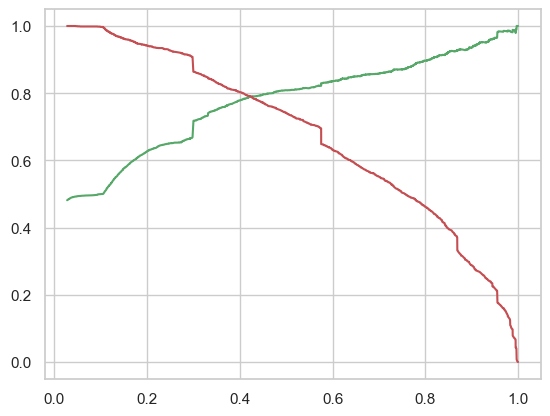

In [257]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [258]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.302224,0,1,1,1,1,0,0,0,0,0,0,0
1,0.0,0.148371,0,1,1,0,0,0,0,0,0,0,0,0
2,1.0,0.123270,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,0.298169,0,1,1,1,0,0,0,0,0,0,0,0
4,1.0,0.954745,1,1,1,1,1,1,1,1,1,1,1,1


In [259]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7951132033176418

In [260]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1875,  437],
       [ 477, 1672]], dtype=int64)

In [261]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

In [262]:
TP/(TP+FP)

0.7927927927927928

### Recall

In [263]:
TP/(TP+FN)

0.7780362959516054

This cutoff point seems good to go!

## Step 5: Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [264]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [265]:
y_test_pred[:10]

4771    0.996230
6122    0.120714
9202    0.729203
6570    0.323062
2668    0.749373
4233    0.804043
3368    0.611650
9091    0.504738
5972    0.296779
3631    0.819903
dtype: float64

In [266]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [267]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996230
6122,0.120714
9202,0.729203
6570,0.323062
2668,0.749373


In [268]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [269]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [270]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [271]:
# Checking the 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996230
1,0,0.120714
2,0,0.729203
3,1,0.323062
4,1,0.749373


In [272]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [273]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996230
1,0,0.120714
2,0,0.729203
3,1,0.323062
4,1,0.749373


In [274]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [275]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996230,1
1,0,0.120714,0
2,0,0.729203,1
3,1,0.323062,0
4,1,0.749373,1


In [276]:
from sklearn import metrics

# Convert both columns to integer type
y_pred_final['Converted'] = y_pred_final['Converted'].astype(int)
y_pred_final['final_predicted'] = y_pred_final['final_predicted'].astype(int)

# Check accuracy
accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7877


In [277]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 197],
       [209, 707]], dtype=int64)

In [278]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [279]:
# Calculating the Precision

TP/(TP+FP)

0.7820796460176991

In [280]:
# Calculating Recall

TP/(TP+FN)

0.7718340611353712